In [5]:
!pip install tensorflow==2.7 keras gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.7


In [6]:
!gdown 1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz

Downloading...
From: https://drive.google.com/uc?id=1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz
To: /content/small_data_set.zip
100% 2.07G/2.07G [00:10<00:00, 191MB/s]


Dataset extracted successfully.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Data prepared for training and validation. Number of classes: 5
Deep neural network model created and compiled.
Model architecture saved as model.png
Epoch 1/10
7/7 [==============================] - 150s 22s/step - loss: 53994.3164 - accuracy: 0.1700 - val_loss: 11840.2021 - val_accuracy: 0.2000
Epoch 2/10
7/7 [==============================] - 132s 19s/step - loss: 5491.3325 - accuracy: 0.2250 - val_loss: 98.4419 - val_accuracy: 0.2600
Epoch 3/10
7/7 [==============================] - 116s 16s/step - loss: 210.8648 - accuracy: 0.2350 - val_loss: 1.7634 - val_accuracy: 0.2000
Epoch 4/10
7/7 [==============================] - 124s 18s/step - loss: 71.3078 - accuracy: 0.2300 - val_loss: 1.8715 - val_accuracy: 0.2000
Epoch 5/10
7/7 [==============================] - 117s 17s/step - loss: 1.7532 - accuracy: 0.1800 - val_loss: 1.6578 - val_accuracy: 0.2000
Epoch 6/10
7/7 [======

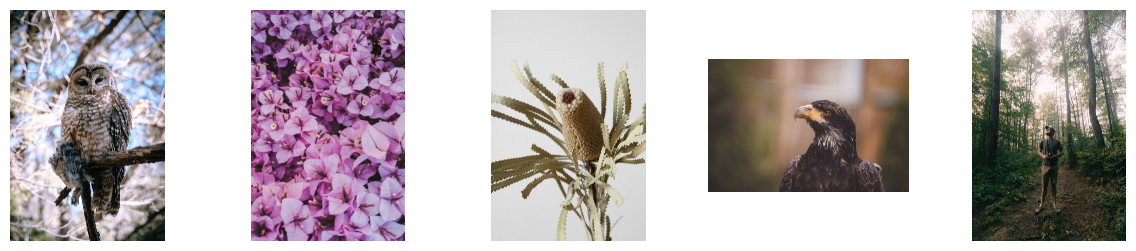

Model trained successfully.


In [7]:
import zipfile
import os
import shutil
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model
import random
import matplotlib.pyplot as plt

class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")

    

    def create_model(self):
        base_model = VGG16(weights="imagenet", include_top=False, input_shape=(*self.image_size, 3))
        base_model.trainable = False
        
        self.model = models.Sequential([
            base_model,
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax")
        ])

        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1), loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")
        plot_model(self.model, to_file="model.png", show_shapes=True)
        print("Model architecture saved as model.png")

    def visualize_images(self):
        # Select 5 random images from the validation dataset
        sample_images = random.sample(self.validation_data.filepaths, 5)

        # Plot the selected images
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        for i, image_path in enumerate(sample_images):
            img = plt.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis("off")
        plt.show()


    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        self.visualize_images()
        print("Model trained successfully.")


zip_file_path = "/content/small_data_set.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()